## Install the gensim Library

In [131]:
from gensim.models import Word2Vec


In [132]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "I like eating apples and bananas.",
    "Natural Language Processing is a fascinating field."
]

In [133]:
from nltk.tokenize import word_tokenize

In [134]:
final_data = []
for sent in sentences:
    final_data.append(word_tokenize(sent))

In [135]:
final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', '.']]

## Create the object

In [136]:
model = Word2Vec(final_data,min_count=1, vector_size=10)

In [137]:
model.wv['apples'] 

array([ 0.07898068, -0.06989504, -0.09155865, -0.00355753, -0.03099841,
        0.07894317,  0.05938574, -0.01545663,  0.01510963,  0.01790041],
      dtype=float32)

In [138]:
model.wv['bananas']  ## Keyedvector means dictionary

array([-0.08534335,  0.03207107, -0.04637997, -0.05088955,  0.03589618,
        0.05370339,  0.07769515, -0.05766506,  0.07433361,  0.06625496],
      dtype=float32)

In [139]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=100

In [140]:
def get_embedding(word):
    try:
        word_embedding = model.wv[word]
        print(f"Word Embedding for '{word}': {word_embedding}")
    except KeyError:
        print(f"Word '{word}' not found in the vocabulary")


In [141]:
get_embedding('fox')

Word Embedding for 'fox': [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]


In [142]:
from sklearn.metrics.pairwise import cosine_similarity

In [143]:
cosine_similarity(model.wv['apples'].reshape(1,-1),model.wv['bananas'].reshape(1,-1))

array([[0.18977958]], dtype=float32)

In [144]:
cosine_similarity(model.wv['fox'].reshape(1,-1),model.wv['dog'].reshape(1,-1))

array([[0.2238495]], dtype=float32)

In [145]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to C:\Users\Administrator.DAI-
[nltk_data]     PC2\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [146]:
from nltk.corpus import abc

In [147]:
sents = abc.sents()

In [148]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [149]:
len(sents)

29059

In [150]:
# Create the object
model = Word2Vec(sents, min_count=1, vector_size=10)

  Using cached FuzzyTM-2.0.9-py3-none-any.whl.metadata (7.9 kB)
  Using cached pyFUME-0.3.4-py3-none-any.whl.metadata (9.7 kB)
  Using cached fst_pso-1.8.1-py3-none-any.whl
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached miniful-0.0.6-py3-none-any.whl
Using cached FuzzyTM-2.0.9-py3-none-any.whl (31 kB)
Using cached pyFUME-0.3.4-py3-none-any.whl (60 kB)
Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 4.29.0 requires pydantic>=2.0, but you have pydantic 1.10.15 which is incompatible.
gradio 4.29.0 requires typer<1.0,>=0.12; sys_platform != "emscripten", but you have typer 0.9.4 which is incompatible.


In [151]:
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [152]:
len(model.wv.key_to_index)

31885

In [153]:
data = model.wv.most_similar('science')
print(data)

[('authority', 0.9830289483070374), ('capitalise', 0.9744672775268555), ('Dubbo', 0.9721997380256653), ('arousal', 0.9708019495010376), ('Hofmann', 0.9698284268379211), ('leading', 0.9696259498596191), ('Women', 0.9654297828674316), ('nurse', 0.9650927782058716), ('bulk', 0.9643573760986328), ('publisher', 0.9623253345489502)]


In [154]:
data = model.wv.most_similar('publisher')
print(data)

[('science', 0.9623252153396606), ('Dubbo', 0.9570678472518921), ('slash', 0.9569305181503296), ('earth', 0.9565941691398621), ('tanning', 0.9548294544219971), ('eliminating', 0.9547839760780334), ('Parkinson', 0.9521516561508179), ('glands', 0.9511515498161316), ('capitalise', 0.9486217498779297), ('triple', 0.9482936859130859)]


In [155]:
model.wv['science'],model.wv['publisher']

(array([ 0.1389948 ,  0.14451098,  2.303897  ,  0.05467478, -0.36715326,
        -0.611297  ,  1.7265123 ,  1.1276414 , -1.3810948 , -0.40271288],
       dtype=float32),
 array([-0.00050814, -0.01233677,  0.21712537,  0.02553154, -0.0815108 ,
        -0.07379097,  0.16010627,  0.04758946, -0.16123955, -0.06141716],
       dtype=float32))

In [156]:
cosine_similarity(model.wv['science'].reshape(1,-1),model.wv['publisher'].reshape(1,-1))

array([[0.9623252]], dtype=float32)

### Reading the data and train the Word2Vec

In [157]:
import json
with open('intents.json','r') as f:
    data = json.load(f)

In [158]:
type(data)

list

In [159]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [160]:
data[0]['patterns']

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [161]:
data[0]['responses']

['Hello, thanks for contacting us',
 'Good to see you here',
 ' Hi there, how may I assist you?']

In [162]:
import pandas as pd
df = pd.DataFrame(data)

In [163]:
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [164]:
df['patterns'][2]

['Thanks for helping me',
 'Thank your guidance',
 "That's helpful and kind from you"]

In [165]:
df['patterns'] = df['patterns'].apply(', '.join)

In [166]:
df['patterns'][2]

"Thanks for helping me, Thank your guidance, That's helpful and kind from you"

In [167]:
from nltk.corpus import stopwords
from textblob import Word
import string
from nltk.tokenize import word_tokenize

In [168]:
stop = stopwords.words('english')
df['patterns'] = df['patterns'].apply(
    lambda x:' '.join(x.lower() for x in x.split())
)
df['patterns'] = df['patterns'].apply(
    lambda x:' '.join(x for x in word_tokenize(x) if x not in string.punctuation)
)
df['patterns'] = df['patterns'].str.replace('[\w\s]', '')
df['patterns'] = df['patterns'].apply(
    lambda x:' '.join(x for x in word_tokenize(x) if not x.isdigit())
)
df['patterns'] = df['patterns'].apply(
    lambda x:' '.join(x for x in word_tokenize(x) if x not in stop)
)
df['patterns'] = df['patterns'].apply(
    lambda x:' '.join(Word(word).lemmatize() for word in word_tokenize(x))
)

In [169]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thanks helping thank guidance 's helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hour open tell opening time open timing please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay using credit card pay using mastercard pay...,"[We accept VISA, Mastercard and credit card, W..."


In [170]:
w = Word('playing')

In [171]:
w.lemmatize(pos='v')

'play'

In [172]:
w.stem()

'play'

In [173]:
# ranking the outer list 
bigger_list = []
for i in df['patterns']:
    li = i.split()
    bigger_list.append(li)

In [174]:
bigger_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thanks', 'helping', 'thank', 'guidance', "'s", 'helpful', 'kind'],
 ['hour', 'open', 'tell', 'opening', 'time', 'open', 'timing', 'please'],
 ['pay',
  'using',
  'credit',
  'card',
  'pay',
  'using',
  'mastercard',
  'pay',
  'using',
  'cash']]

In [184]:
# Custom data in fed to machine for further processing
model = Word2Vec(bigger_list,min_count=1,vector_size=2)
print(model)

Word2Vec<vocab=32, vector_size=2, alpha=0.025>


In [185]:
model.wv['hi']

array([-0.4651475 , -0.35584044], dtype=float32)

In [186]:
model.wv['hello']

array([-0.0472757 ,  0.28846577], dtype=float32)

In [187]:
model.wv['hour']

array([-0.38299197,  0.480774  ], dtype=float32)

In [188]:
model.wv.key_to_index.keys()

dict_keys(['using', 'pay', 'hi', 'open', 'later', 'soon', 'back', 'come', 'goodbye', 'bye', 'see', 'helping', 'available', 'hello', 'talk', 'one', 'thanks', 'cash', 'thank', 'mastercard', "'s", 'helpful', 'kind', 'hour', 'tell', 'opening', 'time', 'timing', 'please', 'credit', 'card', 'guidance'])

In [189]:
import numpy as np
import matplotlib.pyplot as plt

In [190]:
words = list(model.wv.key_to_index.keys())

In [191]:
vectors = []
for word in words:
    vect = model.wv[word]
    vectors.append(list(vect))

In [192]:
vectors = pd.DataFrame(vectors,columns = ['x','y'])

In [193]:
pd.DataFrame(vectors)

,x,y
0,-0.026446,0.012111
1,0.255516,0.450737
2,-0.465147,-0.355840
3,0.322944,0.448649
4,-0.250771,-0.188169
5,0.369174,-0.076581
6,-0.226743,0.327759
7,-0.243008,-0.090801
8,0.143882,0.049662
9,-0.414261,-0.472441


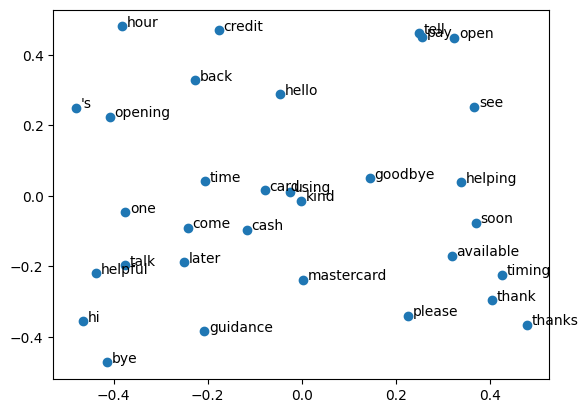

In [194]:
plt.scatter(vectors['x'],vectors['y'])
for i in range(len(words)):
    plt.annotate(xy = (vectors.loc[i,'x']+0.01,vectors.loc[i,'y']),text = words[i])

In [198]:
cosine_similarity(model.wv['tell'].reshape(1,-1),model.wv['open'].reshape(1,-1))

array([[0.99167967]], dtype=float32)

In [207]:
model.wv.most_similar('tell',topn=5)

[('pay', 0.9997815489768982),
 ('open', 0.9916796088218689),
 ('see', 0.8917148113250732),
 ('hello', 0.7916728854179382),
 ('goodbye', 0.7360179424285889)]

In [203]:
dissimilar_words = model.wv.doesnt_match(
    '''see you later, thanks for visiting'''.split())
print(dissimilar_words)

see
